In [100]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df_01_21 = pd.read_parquet('/Users/pitsuevt/work_main/learning/datatalks/mlops_zoomcamp_2025/01-intro/data/green_tripdata_2021-01.parquet')
df_02_21 = pd.read_parquet('/Users/pitsuevt/work_main/learning/datatalks/mlops_zoomcamp_2025/01-intro/data/green_tripdata_2021-02.parquet')

Filtering the data. Choose only 2 Vendor data

In [6]:
df_01_21 = df_01_21[df_01_21['VendorID'] == 2]
df_02_21 = df_02_21[df_02_21['VendorID'] == 2]

In [7]:
df_01_21.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.5,0.5,0.5,0.00,0.0,None,0.3,6.80,2.0,1.0,0.00
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.0,0.5,0.5,2.81,0.0,None,0.3,16.86,1.0,1.0,2.75
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.0,0.5,0.5,1.00,0.0,None,0.3,8.30,1.0,1.0,0.00
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.0,0.5,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00
4,2,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,-52.0,0.0,-0.5,0.00,0.0,None,-0.3,-52.80,3.0,1.0,0.00


Calculate trip duration

In [8]:
df_01_21['trip_duration'] = df_01_21['lpep_dropoff_datetime'] - df_01_21['lpep_pickup_datetime']
df_02_21['trip_duration'] = df_02_21['lpep_dropoff_datetime'] - df_02_21['lpep_pickup_datetime']

In [9]:
td = df_01_21['trip_duration'].loc[1]
td

Timedelta('0 days 00:08:45')

Use lambda function for convert seconds to minutes

In [11]:
df_01_21['trip_duration'] = df_01_21['trip_duration'].apply(lambda x: x.total_seconds()/60)
df_02_21['trip_duration'] = df_02_21['trip_duration'].apply(lambda x: x.total_seconds()/60)

In [12]:
df_01_21

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.50,...,0.5,0.00,0.00,None,0.3,6.80,2.0,1.0,0.00,3.933333
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.00,...,0.5,2.81,0.00,None,0.3,16.86,1.0,1.0,2.75,8.750000
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.00,...,0.5,1.00,0.00,None,0.3,8.30,1.0,1.0,0.00,5.966667
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.00,...,0.5,0.00,0.00,None,0.3,9.30,2.0,1.0,0.00,7.083333
4,2,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,-52.00,...,-0.5,0.00,0.00,None,-0.3,-52.80,3.0,1.0,0.00,0.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,2,2021-01-31 21:38:00,2021-01-31 22:16:00,None,NaN,81,90,NaN,17.63,56.23,...,0.0,0.00,6.12,None,0.3,65.40,NaN,NaN,NaN,38.000000
76514,2,2021-01-31 22:43:00,2021-01-31 23:21:00,None,NaN,35,213,NaN,18.36,46.66,...,0.0,12.20,6.12,None,0.3,65.28,NaN,NaN,NaN,38.000000
76515,2,2021-01-31 22:16:00,2021-01-31 22:27:00,None,NaN,74,69,NaN,2.50,18.95,...,0.0,0.00,0.00,None,0.3,22.00,NaN,NaN,NaN,11.000000
76516,2,2021-01-31 23:10:00,2021-01-31 23:37:00,None,NaN,168,215,NaN,14.48,48.87,...,0.0,0.00,6.12,None,0.3,58.04,NaN,NaN,NaN,27.000000


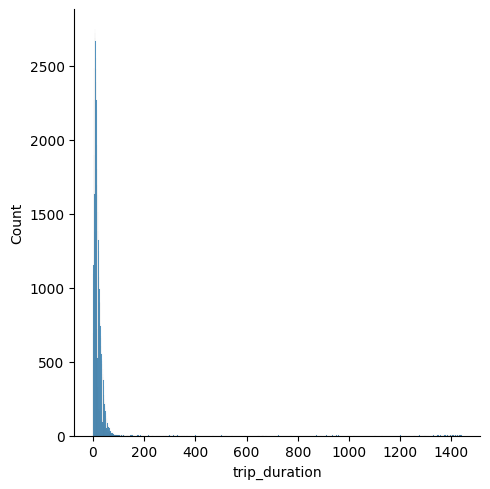

In [14]:
sns.displot(df_01_21['trip_duration'])

In [15]:
df_01_21['trip_duration'].describe()

count    69271.000000
mean        20.622652
std         62.238390
min          0.000000
25%          8.000000
50%         14.000000
75%         23.566667
max       1439.600000
Name: trip_duration, dtype: float64

In [73]:
df_01_21['trip_duration'].describe(percentiles=[0.95, 0.98, 0.99])

count    69271.000000
mean        20.622652
std         62.238390
min          0.000000
50%         14.000000
95%         45.000000
98%         57.000000
99%         69.000000
max       1439.600000
Name: trip_duration, dtype: float64

Extra filtering

In [20]:
df_01_21 = df_01_21[(df_01_21['trip_duration'] >=1) & (df_01_21['trip_duration'] <=60)]

df_01_21

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.50,...,0.5,0.00,0.00,None,0.3,6.80,2.0,1.0,0.00,3.933333
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.00,...,0.5,2.81,0.00,None,0.3,16.86,1.0,1.0,2.75,8.750000
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.00,...,0.5,1.00,0.00,None,0.3,8.30,1.0,1.0,0.00,5.966667
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.00,...,0.5,0.00,0.00,None,0.3,9.30,2.0,1.0,0.00,7.083333
7,2,2021-01-01 00:26:31,2021-01-01 00:28:50,N,1.0,75,75,6.0,0.45,3.50,...,0.5,0.96,0.00,None,0.3,5.76,1.0,1.0,0.00,2.316667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,2,2021-01-31 21:38:00,2021-01-31 22:16:00,None,NaN,81,90,NaN,17.63,56.23,...,0.0,0.00,6.12,None,0.3,65.40,NaN,NaN,NaN,38.000000
76514,2,2021-01-31 22:43:00,2021-01-31 23:21:00,None,NaN,35,213,NaN,18.36,46.66,...,0.0,12.20,6.12,None,0.3,65.28,NaN,NaN,NaN,38.000000
76515,2,2021-01-31 22:16:00,2021-01-31 22:27:00,None,NaN,74,69,NaN,2.50,18.95,...,0.0,0.00,0.00,None,0.3,22.00,NaN,NaN,NaN,11.000000
76516,2,2021-01-31 23:10:00,2021-01-31 23:37:00,None,NaN,168,215,NaN,14.48,48.87,...,0.0,0.00,6.12,None,0.3,58.04,NaN,NaN,NaN,27.000000


Set features

In [21]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

### Train a model

import ML models

In [108]:
from sklearn.feature_extraction import DictVectorizer # import dict vectorize
from sklearn.linear_model import LinearRegression # import linear regression model
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error

In [23]:
df_01_21[categorical + numerical]

,PULocationID,DOLocationID,trip_distance
0,43,151,1.01
1,166,239,2.53
2,41,42,1.12
3,168,75,1.99
7,75,75,0.45
...,...,...,...
76513,81,90,17.63
76514,35,213,18.36
76515,74,69,2.50
76516,168,215,14.48


Convert our df into dictionary

In [39]:
df_01_21_dict = df_01_21[categorical + numerical].to_dict(orient='records')
df_01_21_dict[:10]

[{'PULocationID': 43, 'DOLocationID': 151, 'trip_distance': 1.01},
 {'PULocationID': 166, 'DOLocationID': 239, 'trip_distance': 2.53},
 {'PULocationID': 41, 'DOLocationID': 42, 'trip_distance': 1.12},
 {'PULocationID': 168, 'DOLocationID': 75, 'trip_distance': 1.99},
 {'PULocationID': 75, 'DOLocationID': 75, 'trip_distance': 0.45},
 {'PULocationID': 225, 'DOLocationID': 265, 'trip_distance': 12.19},
 {'PULocationID': 244, 'DOLocationID': 244, 'trip_distance': 3.39},
 {'PULocationID': 75, 'DOLocationID': 213, 'trip_distance': 6.69},
 {'PULocationID': 74, 'DOLocationID': 238, 'trip_distance': 2.34},
 {'PULocationID': 74, 'DOLocationID': 60, 'trip_distance': 5.48}]

Vectorize our dict

In [29]:
dv = DictVectorizer()

In [30]:
X_train = dv.fit_transform(df_01_21_dict)

Now we get the matrix

In [31]:
X_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 200766 stored elements and shape (66922, 3)>

Set a target variable

In [38]:
target = 'trip_duration'
y_train = df_01_21[target].values
y_train

array([ 3.93333333,  8.75      ,  5.96666667, ..., 11.        ,
       27.        , 10.        ], shape=(66922,))

#### Finally train our model - basic Linear Regression

In [40]:
lr = LinearRegression()

In [41]:
lr.fit(X_train, y_train)

LinearRegression()

In [42]:
y_pred = lr.predict(X_train)

/var/folders/rg/_7ykhlgd7csf21779wt0t6380000gn/T/ipykernel_31353/2772668395.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/var/folders/rg/_7ykhlgd7csf21779wt0t6380000gn/T/ipykernel_31353/2772668395.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, lab

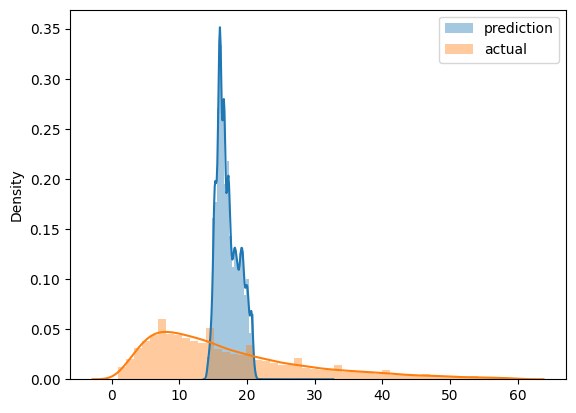

In [43]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')


plt.legend()

Check a quality of our model

In [45]:
mean_squared_error(y_train, y_pred)

135.2926642640404

Let's reorganize our code and put it into functions

1. A function for reading the data

In [46]:
def read_dataframe(filename):    
    df = pd.read_parquet(filename)
    
    df['trip_duration'] = df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']
    df['trip_duration'] = df['trip_duration'].apply(lambda x: x.total_seconds()/60)

    df = df[(df['trip_duration'] >=1) & (df['trip_duration'] <=60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)

    return df    

In [47]:
df_train = read_dataframe('/Users/pitsuevt/work_main/learning/datatalks/mlops_zoomcamp_2025/01-intro/data/green_tripdata_2021-01.parquet')
df_val = read_dataframe('/Users/pitsuevt/work_main/learning/datatalks/mlops_zoomcamp_2025/01-intro/data/green_tripdata_2021-02.parquet')

In [81]:
df_train.shape, df_val.shape

((73908, 21), (61921, 21))

In [84]:
df_train = df_train[:61921]

2. A function for training the model

In [85]:

def feature_vectorizing(df_train, df_val):    
    categorical = ['PULocationID', 'DOLocationID']
    numerical = ['trip_distance']
    

    # set feature matrix
    dv = DictVectorizer()
    
    train_dicts = df_train[categorical + numerical].to_dict(orient='records')
    X_train = dv.fit_transform(train_dicts)
    
    val_dicts = df_val[categorical + numerical].to_dict(orient='records')
    X_val = dv.transform(val_dicts)


    #set a target
    target = 'trip_duration'
    y_train = df_train[target].values
    y_val = df_val[target].values

    return X_train, X_val, y_train, y_val

In [86]:
X_train, X_val, y_train, y_val = feature_vectorizing(df_train, df_val)

In [87]:
X_train, X_val

(<Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 185763 stored elements and shape (61921, 503)>,
 <Compressed Sparse Row sparse matrix of dtype 'float64'
 	with 185754 stored elements and shape (61921, 503)>)

In [88]:
y_train, y_val

(array([ 3.93333333,  8.75      ,  5.96666667, ..., 12.        ,
        38.        , 35.        ], shape=(61921,)),
 array([17.91666667,  6.5       , 15.25      , ..., 14.        ,
         7.        ,  7.        ], shape=(61921,)))

In [89]:
def model_execution(X_train, X_val, y_train, y_val):
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    
    y_pred = lr.predict(X_val)
    
    mse = mean_squared_error(y_val, y_pred)

    return mse

In [90]:
model_execution(X_train, X_val, y_train, y_val)

111.30202209303084

Our model doesn't look great. So we can try another model, for example Lasso Regression

In [92]:
lr = Lasso(alpha=0.05)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred)

131.2588425333294

Ridge Regression

In [93]:
lr = Ridge()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred)

110.80969609921343

In [109]:
root_mean_squared_error(y_val, y_pred)

10.526618455098172

In [95]:
df_train['trip_duration'].describe()

count    61921.000000
mean        16.131711
std         11.358408
min          1.000000
25%          7.850000
50%         13.000000
75%         21.300000
max         60.000000
Name: trip_duration, dtype: float64

In [104]:
y_val.mean()

np.float64(17.848622438268112)

In [105]:
y_pred.mean()

np.float64(16.51398651344867)

In [106]:
errors = y_val - y_pred

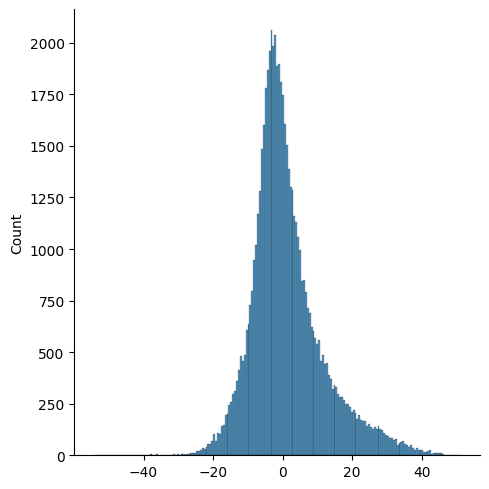

In [107]:
sns.displot(errors)

/var/folders/rg/_7ykhlgd7csf21779wt0t6380000gn/T/ipykernel_31353/4227096839.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/var/folders/rg/_7ykhlgd7csf21779wt0t6380000gn/T/ipykernel_31353/4227096839.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_val, label

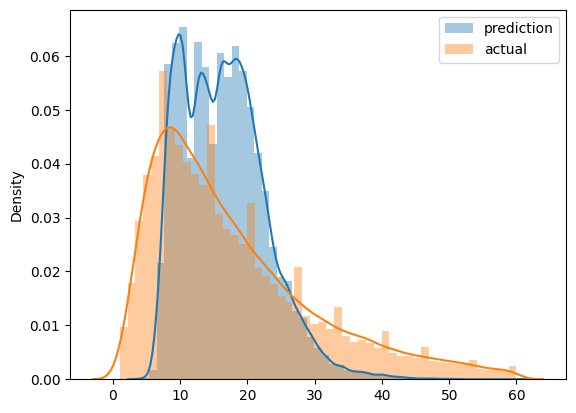

In [101]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_val, label='actual')


plt.legend()

Save the model

In [111]:
import pickle

In [112]:
with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)